In [1]:
%matplotlib inline
import pyfolio as pf
from pyfolio import timeseries
from pyfolio.utils import APPROX_BDAYS_PER_MONTH
from pyfolio import tears
from pyfolio import bayesian

Couldn't import dot_parser, loading of dot files will not be possible.


In [2]:
stock_rets = pf.utils.get_symbol_rets('FB')

In [3]:
rolling_window = APPROX_BDAYS_PER_MONTH * 2
rolling_beta = timeseries.rolling_fama_french(
    stock_rets,
    rolling_window=rolling_window)


In [4]:
len(rolling_beta.dropna())

804

In [ ]:
rolling_beta.shape

(865, 3)

In [ ]:
ok = bayesian.model_returns_t_alpha_beta(stock_rets, rolling_beta, samples=2000)

> /Users/rbussman/Jobs/Quantopian/pyfolio/pyfolio/bayesian.py(101)model_returns_t_alpha_beta()
-> pm.T('returns',
(Pdb) mu_reg
Elemwise{add,no_inplace}.0
(Pdb) ab_reg[i]
beta
(Pdb) pm.Normal('alpha', mu=0, sd=.1, testval=alpha_init)
*** NameError: name 'alpha_init' is not defined


In [15]:
out_of_sample = stock_rets.index[-40]
tears.create_bayesian_tear_sheet(stock_rets, live_start_date=out_of_sample, benchmark_rets=rolling_beta)

Running T model


KeyboardInterrupt: 

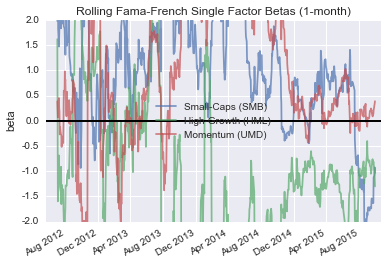

In [9]:
pf.plotting.plot_rolling_fama_french(stock_rets, rolling_window=30)